# Explore and Plot the ATL data
Clip the previously processed hdf files to shapefiles to match area of interest


In [1]:
%matplotlib inline

In [2]:
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (15, 8), 'font.size': 10})

from shapely.geometry import Polygon, Point
# for saving to kml
# import fiona
# fiona.supported_drivers['KML'] = 'rw'

In [3]:
import hvplot
import hvplot.pandas
import geoviews as gv

In [4]:
lake = gpd.read_file('gis/aoi_greenland/lake.shp') #D:/wspace/icesat2
lake.crs

{'init': 'epsg:4326'}

In [4]:
icesat2_path = 'D:/wspace/icesat2/lakes'
files = os.listdir(f'{icesat2_path}')
outline = gpd.read_file(f'{icesat2_path}/outline.shp')
outline

,id,geometry
0,0,"POLYGON ((-20.75000 78.80000, -21.34000 78.800..."


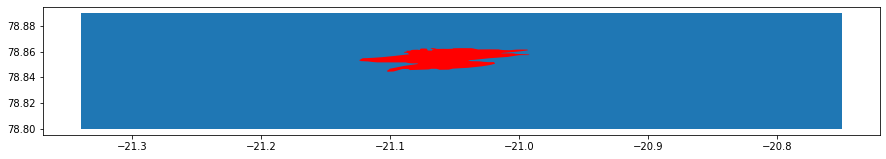

In [5]:
# outline = outline.to_crs({'init': 'epsg:4326'})
ax = outline.plot()
lake.plot(ax=ax, color='r');

In [6]:
lk = lake.hvplot(geo=True, color='r', alpha=.1)
lk

:Polygons   [Longitude,Latitude]

# Clip granules intersecting the lake to make time series plots for meeting poster

# Start here for clipped shapefiles

In [7]:
# shp_files = [f for f in files if f.endswith('.shp') and 'ATL06' in f]
shp_files = [f for f in os.listdir(f'{icesat2_path}/clips') if f.endswith('.shp')]

In [8]:
shp_files

['processed_ATL06_20181026153716_04280103_002_01.shp',
 'processed_ATL06_20181218023352_12290105_002_01.shp',
 'processed_ATL06_20181227124101_13730103_002_01.shp',
 'processed_ATL06_20190217233746_07870205_002_01.shp',
 'processed_ATL06_20190426065655_04280303_002_01.shp',
 'processed_ATL06_20190617175325_12290305_002_01.shp',
 'processed_ATL06_20190726023631_04280403_002_01.shp']

In [9]:
len(shp_files)

7

In [10]:
icesat2_path = f'{icesat2_path}/clips'
icesat2_path

'D:/wspace/icesat2/lakes/clips'

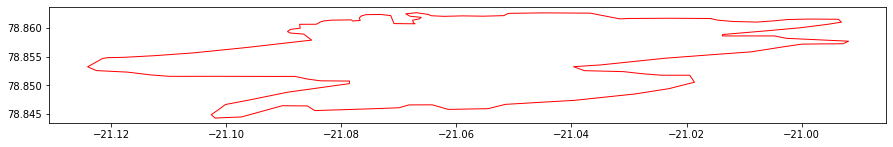

In [11]:
lake.plot(edgecolor='r', facecolor='w')

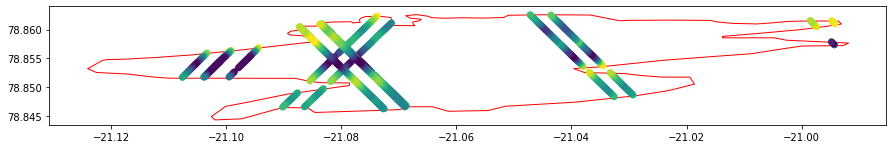

In [12]:
ax = lake.plot(edgecolor='r', facecolor='w')

for shp in shp_files:
    gdf = gpd.read_file(f'{icesat2_path}/{shp}')
    gdf.plot(ax=ax, column='h_li')

In [13]:
dates = [f.split('_ATL06_')[1][:8] for f in shp_files]
dates

['20181026',
 '20181218',
 '20181227',
 '20190217',
 '20190426',
 '20190617',
 '20190726']

In [14]:
shp1 = f'{icesat2_path}/{shp_files[-1]}'
gdf1 = gpd.read_file(shp1)

shp2 = f'{icesat2_path}/{shp_files[-2]}'
gdf2 = gpd.read_file(shp2)

shp3 = f'{icesat2_path}/{shp_files[-3]}' 
gdf3 = gpd.read_file(shp3)

shp4 = f'{icesat2_path}/{shp_files[-4]}' 
gdf4 = gpd.read_file(shp4)

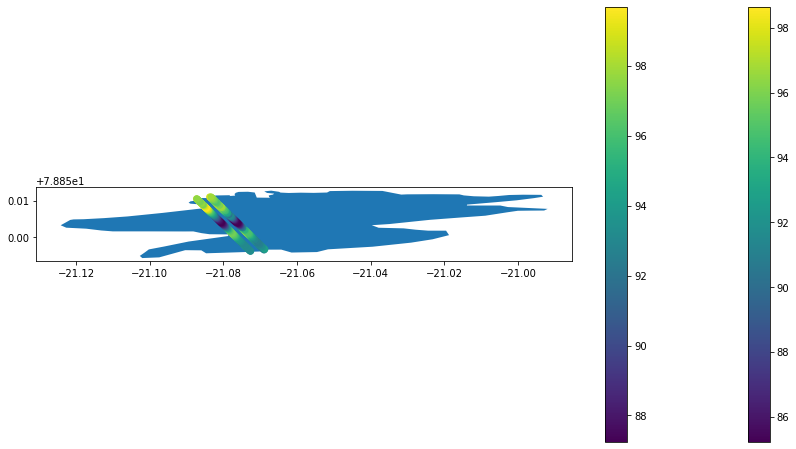

In [15]:
ax = lake.plot()
gdf1.plot(ax=ax, column='h_li', legend=True)
# gdf2.plot(ax=ax, column='h_li', legend=True)
gdf3.plot(ax=ax, column='h_li', legend=True)
# gdf4.plot(ax=ax, column='h_li', legend=True)

In [16]:
# fname = shp_files[-3]#.split('.shp')[0]
# df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
# gdf = gpd.read_file(f'{icesat2_path}/{fname}', parse_dates=True)
# gdf['lon'] = gdf.geometry.x
# gdf['lat'] = gdf.geometry.y

base = gv.tile_sources.ESRI
strips1 = gdf1.hvplot.points(geo=True, color='strip', alpha=0.7, width=400, height=600)
strips3 = gdf3.hvplot.points(geo=True, color='strip', alpha=0.7, width=400, height=600)
# terrain_scatter = df.hvplot(y='lat', x='h_li', color='strip', kind='scatter', width=400, height=600, alpha=.7) 

In [17]:
fig2 = base*lk*strips1
# hvplot.save(fig2, f'{icesat2_path}/green_map.png')
fig2


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (strip)

In [18]:
gdf1.geometry.x

0     -21.072710
1     -21.072889
2     -21.073066
3     -21.073244
4     -21.073414
         ...    
159   -21.083020
160   -21.083197
161   -21.083374
162   -21.083551
163   -21.083730
Length: 164, dtype: float64

In [19]:
import numpy as np
import holoviews as hv
from holoviews import dim, opts

hv.extension('holoviews')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [20]:
y,x = np.mgrid[-5:5, -5:5] * 0.1
heights = np.sin(x**2+y**2)

:Scatter3D   [x,y,z]
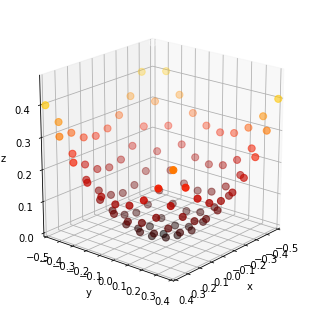

In [21]:
hv.Scatter3D((x.flat, y.flat, heights.flat)).opts(
    opts.Scatter3D(azimuth=40, elevation=20, color='z', s=50, cmap='fire'))

In [22]:
# gdf1.geometry.x.values

In [24]:
from mpl_toolkits.mplot3d import Axes3D


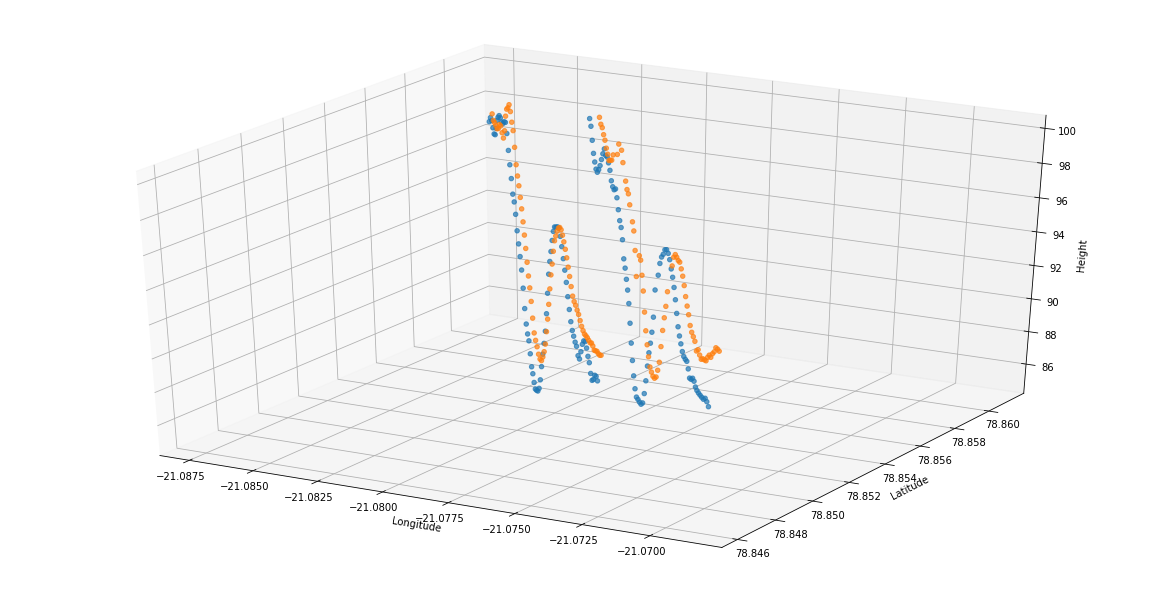

In [25]:
fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d') # left, bottom, width, height (range 0 to 1);
ax.scatter(gdf1.geometry.x, gdf1.geometry.y, gdf1.h_li, alpha=0.7) #c=y_train, 
ax.scatter(gdf3.geometry.x, gdf3.geometry.y, gdf3.h_li, alpha=0.7) #c=y_train, 
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height');

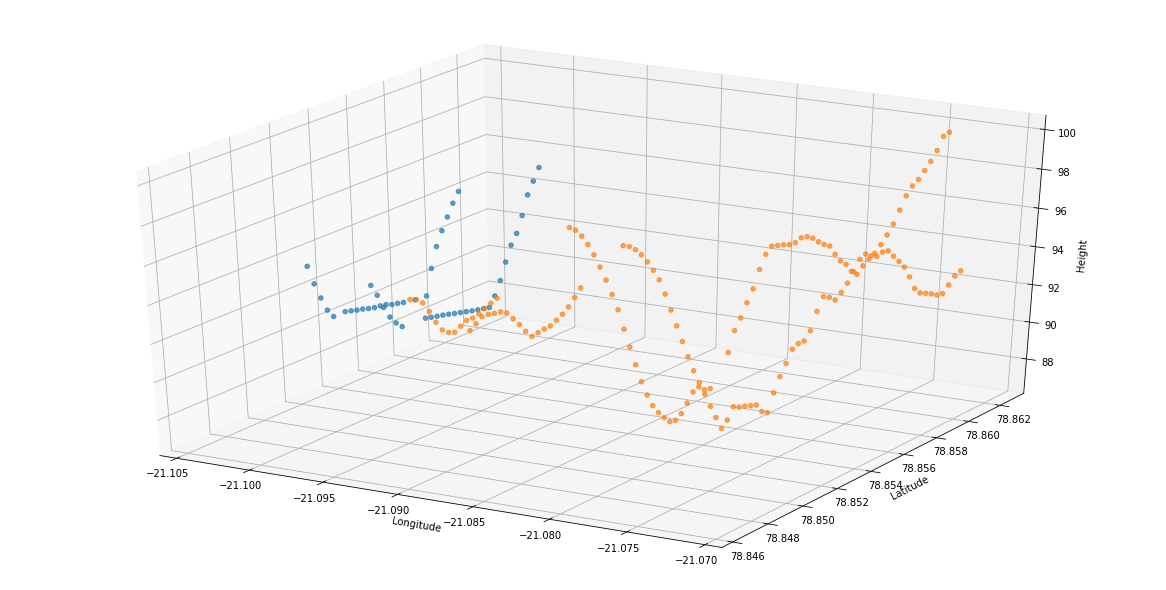

In [26]:
fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='3d') # left, bottom, width, height (range 0 to 1);
ax.scatter(gdf2.geometry.x, gdf2.geometry.y, gdf2.h_li, alpha=0.7) #c=y_train, 
ax.scatter(gdf4.geometry.x, gdf4.geometry.y, gdf4.h_li, alpha=0.7) #c=y_train, 
# ax.scatter(gt1r.lon, gt1r.lat, gt1r.h_li, alpha=0.3) #c=y_train, 

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Height');

In [28]:
# gdf['lon'] = gdf.geometry.x
# gdf['lat'] = gdf.geometry.y

# base = gv.tile_sources.ESRI
# strips = gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=400, height=600, hover=['strip', 'h_li'])
# terrain_scatter = df.hvplot(y='lat', x='h_li', color='strip', kind='scatter', width=400, height=600, alpha=.7) 

In [29]:
gdf3.head()

,t_dt,h_li,q_flag,strip,geometry
0,2019-04-26 07:02:39.260000,93.464508,0,gt1l,POINT (-21.07258 78.84627)
1,2019-04-26 07:02:39.263000,93.336205,0,gt1l,POINT (-21.07276 78.84644)
2,2019-04-26 07:02:39.265000,93.292191,0,gt1l,POINT (-21.07294 78.84662)
3,2019-04-26 07:02:39.268000,93.297325,0,gt1l,POINT (-21.07312 78.84679)
4,2019-04-26 07:02:39.271000,93.189217,0,gt1l,POINT (-21.07329 78.84697)


In [30]:
gdf1['t_dt'] =  pd.to_datetime(gdf1.t_dt)
gdf3['t_dt'] =  pd.to_datetime(gdf3.t_dt)

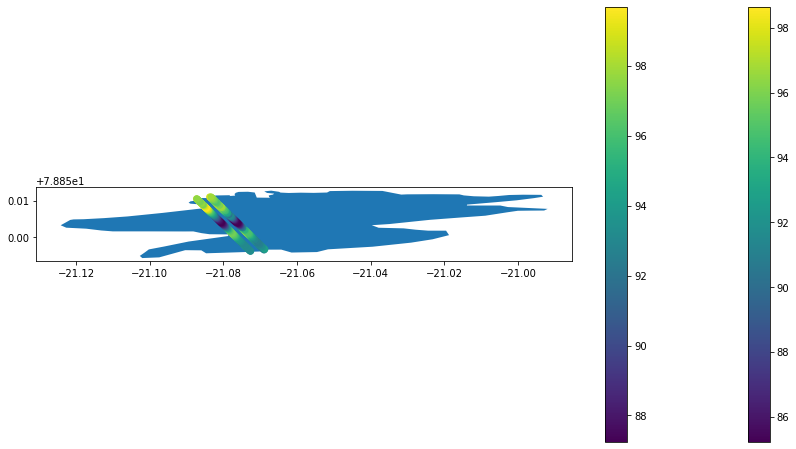

In [33]:
ax = lake.plot()
gdf1.plot(ax=ax, column='h_li', legend=True)
# gdf2.plot(ax=ax, column='h_li', legend=True)
gdf3.plot(ax=ax, column='h_li', legend=True)
# gdf4.plot(ax=ax, column='h_li', legend=True)

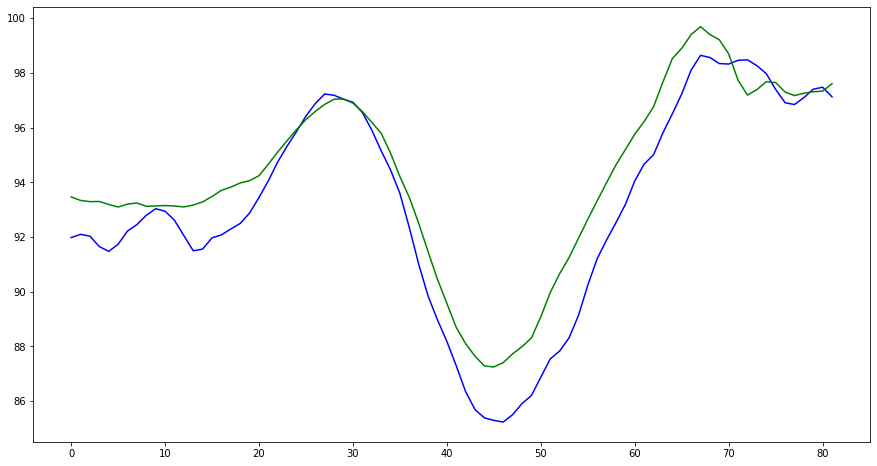

In [34]:
gdf1[gdf1.strip=='gt1l'].h_li.plot(color='b')
gdf3[gdf3.strip=='gt1l'].h_li.plot(color='g')

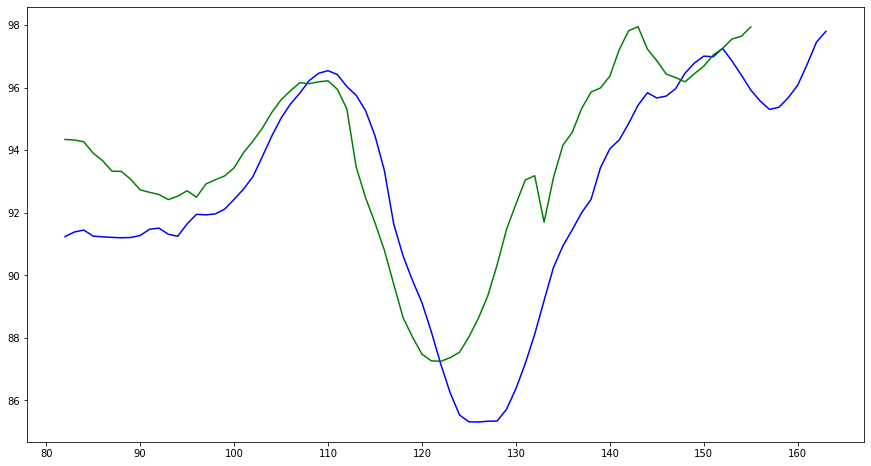

In [35]:
gdf1[gdf1.strip=='gt1r'].h_li.plot(color='b')
gdf3[gdf3.strip=='gt1r'].h_li.plot(color='g')

In [36]:
len(gdf1[gdf1.strip=='gt1l']), len(gdf3[gdf3.strip=='gt1l'])

(82, 82)

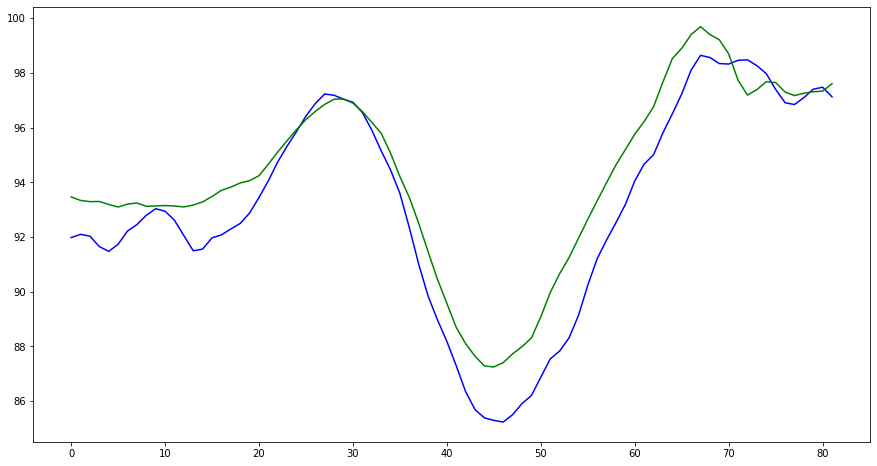

In [37]:
gdf1[gdf1.strip=='gt1l'].h_li.plot(color='b')
gdf3[gdf3.strip=='gt1l'].h_li.plot(color='g')

:Scatter   [t_dt]   (h_li,strip)
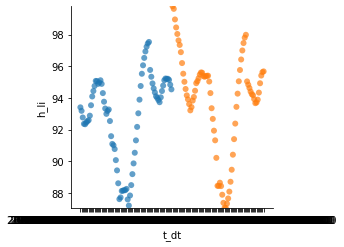

In [39]:
# gdf4.h_li.hvplot(c='strip')
gdf4[['h_li', 't_dt', 'strip']].hvplot(y='h_li', x='t_dt', color='strip', kind='scatter', width=400, height=600, alpha=.7)

In [41]:
combined = pd.concat([gdf1, gdf2, gdf3, gdf4])

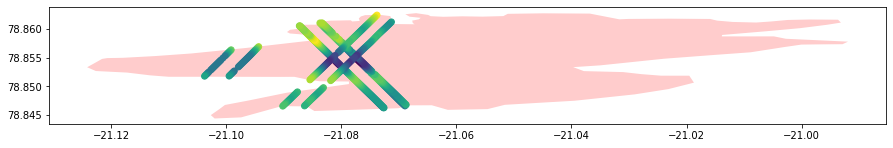

In [42]:
ax = lake.plot(color='red', alpha=.2)
combined.plot(ax=ax, column='h_li');

In [43]:
combined

,t_dt,h_li,q_flag,strip,geometry
0,2019-07-26 02:42:15.332000,91.977325,0,gt1l,POINT (-21.07271 78.84626)
1,2019-07-26 02:42:15.335000,92.096870,0,gt1l,POINT (-21.07289 78.84644)
2,2019-07-26 02:42:15.338000,92.030769,0,gt1l,POINT (-21.07307 78.84661)
3,2019-07-26 02:42:15.341000,91.651123,0,gt1l,POINT (-21.07324 78.84679)
4,2019-07-26 02:42:15.343000,91.473610,0,gt1l,POINT (-21.07341 78.84696)
...,...,...,...,...,...
151,2019-02-17 23:38:41.951000,94.332558,0,gt1r,POINT (-21.08945 78.84726)
152,2019-02-17 23:38:41.954000,94.923157,0,gt1r,POINT (-21.08963 78.84709)
153,2019-02-17 23:38:41.957000,95.409546,0,gt1r,POINT (-21.08981 78.84691)
154,2019-02-17 23:38:41.960000,95.624916,0,gt1r,POINT (-21.09000 78.84674)


In [45]:
gdf1.head()

,t_dt,h_li,q_flag,strip,geometry
0,2019-07-26 02:42:15.332,91.977325,0,gt1l,POINT (-21.07271 78.84626)
1,2019-07-26 02:42:15.335,92.096870,0,gt1l,POINT (-21.07289 78.84644)
2,2019-07-26 02:42:15.338,92.030769,0,gt1l,POINT (-21.07307 78.84661)
3,2019-07-26 02:42:15.341,91.651123,0,gt1l,POINT (-21.07324 78.84679)
4,2019-07-26 02:42:15.343,91.473610,0,gt1l,POINT (-21.07341 78.84696)


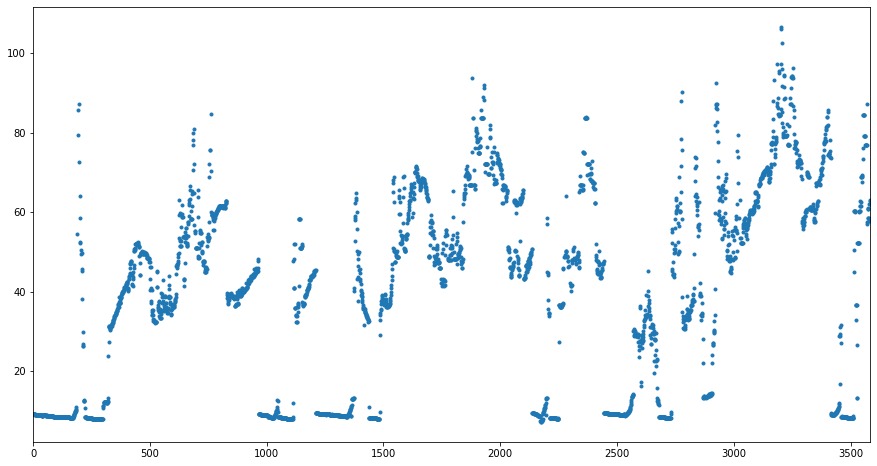

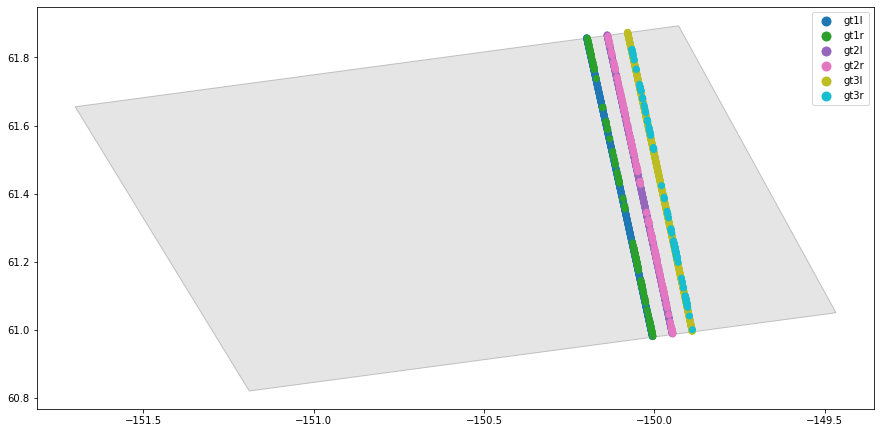

In [59]:
gdf[gdf.layer_flag==1].h_te_media.plot(style='.')
# gdf[gdf.layer_flag==0].h_te_media.plot(style='o', alpha=.6)

ax = outline.plot(edgecolor='k', facecolor='gray', alpha=.2)
gdf.plot(column='strip', legend=True, ax=ax);